In [ ]:
# First let's check if we have the library set in our jupyter notebook 
! pip install nltk



In [2]:
# Import the library 
import nltk

# Install the required tokenization function
from nltk.tokenize import sent_tokenize

In [3]:
# For practise purposes we will use a standard text snippet
text = """We took this ball to the beach and after close to 2 hours to pump it up, we pushed it
around for about 10 fun filled minutes. That was when the wind picked it up and sent it huddling down 
the beach at about 40 knots. It destroyed everything in its path. Children screamed in terror at 
the giant inflatable monster that crushed their sand castles. Grown men were knocked down trying to save their families. 
The faster we chased it, the faster it rolled. It was like it was mocking us. Eventually, we had to stop running 
after it because its path of injury and destruction was going to cost us a fortune in legal fees. Rumor has it that it 
can still be seen stalking innocent families on the Florida panhandle. We lost it in South Carolina, 
so there is something to be said about its durability."""

# Tokenize the text data
tokenized_sentence = sent_tokenize(text)

# Check the result
print(tokenized_sentence)

['We took this ball to the beach and after close to 2 hours to pump it up, we pushed it\naround for about 10 fun filled minutes.', 'That was when the wind picked it up and sent it huddling down \nthe beach at about 40 knots.', 'It destroyed everything in its path.', 'Children screamed in terror at \nthe giant inflatable monster that crushed their sand castles.', 'Grown men were knocked down trying to save their families.', 'The faster we chased it, the faster it rolled.', 'It was like it was mocking us.', 'Eventually, we had to stop running \nafter it because its path of injury and destruction was going to cost us a fortune in legal fees.', 'Rumor has it that it \ncan still be seen stalking innocent families on the Florida panhandle.', 'We lost it in South Carolina, \nso there is something to be said about its durability.']


The text is now tokenized into a list as a whole. Since this text is rather long it makes more sense to perform word tokenization.

In [4]:
# Import the function word_tokenize
from nltk.tokenize import word_tokenize

# Tokenize the text data
tokenized_word = word_tokenize(text)

# Check the results
print(tokenized_word)

['We', 'took', 'this', 'ball', 'to', 'the', 'beach', 'and', 'after', 'close', 'to', '2', 'hours', 'to', 'pump', 'it', 'up', ',', 'we', 'pushed', 'it', 'around', 'for', 'about', '10', 'fun', 'filled', 'minutes', '.', 'That', 'was', 'when', 'the', 'wind', 'picked', 'it', 'up', 'and', 'sent', 'it', 'huddling', 'down', 'the', 'beach', 'at', 'about', '40', 'knots', '.', 'It', 'destroyed', 'everything', 'in', 'its', 'path', '.', 'Children', 'screamed', 'in', 'terror', 'at', 'the', 'giant', 'inflatable', 'monster', 'that', 'crushed', 'their', 'sand', 'castles', '.', 'Grown', 'men', 'were', 'knocked', 'down', 'trying', 'to', 'save', 'their', 'families', '.', 'The', 'faster', 'we', 'chased', 'it', ',', 'the', 'faster', 'it', 'rolled', '.', 'It', 'was', 'like', 'it', 'was', 'mocking', 'us', '.', 'Eventually', ',', 'we', 'had', 'to', 'stop', 'running', 'after', 'it', 'because', 'its', 'path', 'of', 'injury', 'and', 'destruction', 'was', 'going', 'to', 'cost', 'us', 'a', 'fortune', 'in', 'legal', 

### Analyze individual words

The preprocessing allows us to analyze and compare the words. When working with a set of reviews it would allow us to make comparison ans calculations.

In [5]:
# Import the class FreqiDist to measure frequency distribution in a tokenized data set
from nltk.probability import FreqDist

# Calculate the frequency distribution by creating a freq_dist_of_words object based on the FreqDist class
freq_dist_of_words = FreqDist(tokenized_word)

# Show the top 5 most common elements in the data set
freq_dist_of_words.most_common(5)

[('it', 11), ('.', 10), ('to', 7), ('the', 6), (',', 4)]

The punctuations were also counted as words. As a next step we can visualize the frequency of the words in this text.

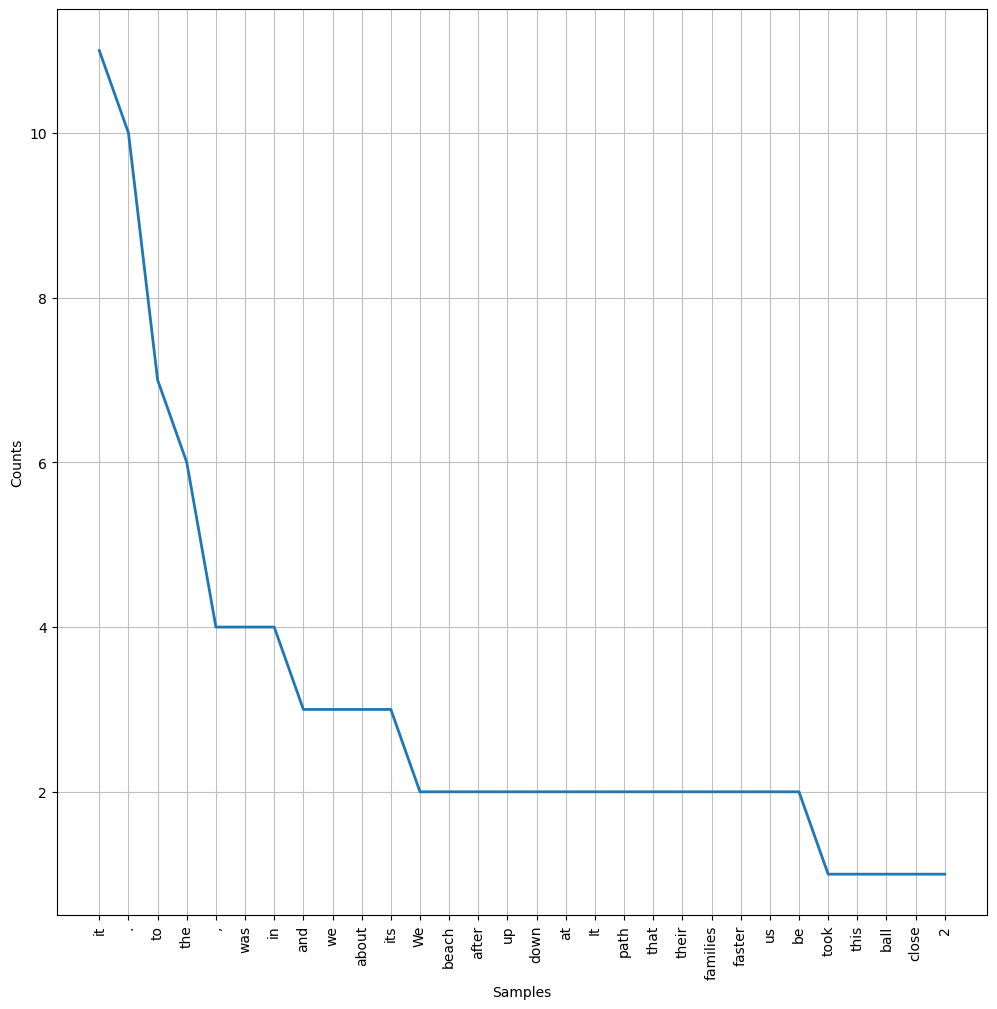

In [6]:
# Import matplotlib
import matplotlib.pyplot as plt

# Define the figure and axis
fig, ax = plt.subplots(dpi = 100)
fig.set_size_inches(12,12)

# Plot the data set
freq_dist_of_words.plot(30, cumulative = False)

# Set the labels for the axes 
ax.set_xlabel('Counts', fontsize = 20)
ax.set_ylabel('Samles', fontsize = 20)

# Distplay the result.
plt.show()

As we can see there is not much information we can get from the text at this stage. We need to remove the noise if we want to get insightful information out of this. 

# Noise Removal

Stop words such as the and a are words that need to be filtered because they do not add to the overall meaning of the sentence. For statistical purposes they add unessecary counts which is something we want to avoid. 

The NLTK library contains a stopword list which we can use in order to filter them out from our text

In [10]:
# Import the package
from nltk.corpus import stopwords

# Create a set of English stop words
stop_words = set(stopwords.words('english'))

# Check what set of words we created
print(stop_words)

{'so', 'was', 'him', 'ourselves', 'it', 'himself', 'couldn', 'not', 'has', 'are', 'its', 'itself', "should've", 'me', 'and', 'out', 'i', 'you', 'very', 'his', 'ours', 'as', "didn't", 'nor', 'through', "couldn't", 'before', 'been', 'by', 'against', 'whom', 'once', 'where', 'wouldn', "you'd", 've', 'about', 'she', 'these', 'am', 'or', 'doesn', 'at', 'yours', 'shouldn', 'below', 'o', 'an', 'over', 'how', 'few', 'from', 'same', 'when', 'didn', 'other', 'did', 'won', 'if', 'have', 'some', 't', 'ma', 'do', "haven't", 'more', 'any', 'which', 'such', 'in', 'll', 'can', 'needn', "hasn't", 'being', 'm', 'our', 'them', "you're", 'that', 'should', 'had', 'then', 'with', 'yourselves', 'myself', 'wasn', 'he', 'my', 'but', 'themselves', 'herself', "she's", 'those', 'mightn', 'does', "don't", "mustn't", 'don', 'down', 'only', 'until', "hadn't", 'ain', "you've", 'here', 'their', 'both', 'your', 'because', 'yourself', 'doing', 'just', 'all', 'be', "shouldn't", 'hadn', 'hers', 'the', 'no', 'they', 'shan'

In [11]:
# Now let's remove the stop words. We need to add the clean text into a list
filtered_text = []

# Create a tokenized word list.
tokenized_word = word_tokenize(text)

# Filter the tokenized words
for each_word in tokenized_word:
    if each_word not in stop_words:
        filtered_text.append(each_word)
        
# Display the filtered list
print('Tokenized list without stop words: {}'.format(filtered_text))

Tokenized list without stop words: ['We', 'took', 'ball', 'beach', 'close', '2', 'hours', 'pump', ',', 'pushed', 'around', '10', 'fun', 'filled', 'minutes', '.', 'That', 'wind', 'picked', 'sent', 'huddling', 'beach', '40', 'knots', '.', 'It', 'destroyed', 'everything', 'path', '.', 'Children', 'screamed', 'terror', 'giant', 'inflatable', 'monster', 'crushed', 'sand', 'castles', '.', 'Grown', 'men', 'knocked', 'trying', 'save', 'families', '.', 'The', 'faster', 'chased', ',', 'faster', 'rolled', '.', 'It', 'like', 'mocking', 'us', '.', 'Eventually', ',', 'stop', 'running', 'path', 'injury', 'destruction', 'going', 'cost', 'us', 'fortune', 'legal', 'fees', '.', 'Rumor', 'still', 'seen', 'stalking', 'innocent', 'families', 'Florida', 'panhandle', '.', 'We', 'lost', 'South', 'Carolina', ',', 'something', 'said', 'durability', '.']


### Snowball Stemmer Algorithm

Steming returns the root of a word. For example all variations of sing = singing, sang... will return sing. Like this we can analyze the text blocks more effectively when using quantitative analytics.

In [14]:
# Import the SnowballStemmer to apply stemming to word lists
from nltk.stem.snowball import SnowballStemmer

# Create a stemming object
snow_stem = SnowballStemmer(language = 'english')

# Create a list of test words
words = ['easily', 'durability', 'longest', 'wishing', 'shining', 'fantasizing', 'off-putting']

# Apply the stemming process to each word
for word in words:
    print(word + '---->' + snow_stem.stem(word))

easily---->easili
durability---->durabl
longest---->longest
wishing---->wish
shining---->shine
fantasizing---->fantas
off-putting---->off-put


### Interpretation

The result is mixed while words like wish worked pretty good and shining as well, the rest was not very useful.


## Lematizer

Let's use the lemmatizer to find and return the dictionary version of a word. 

In [17]:
# Import the wordnetlemmatizyer
from nltk.stem.wordnet import WordNetLemmatizer

# Create an instance of the class
lemmatizer = WordNetLemmatizer()

# Define a text string to test
text = """It was like it was mocking us. Eventually, we had to stop running 
after it because its path of injury and destruction was going to cost us a fortune in legal fees. Rumor has it that it 
can still be seen stalking innocent families on the Florida panhandle. We lost it in South Carolina, 
so there is something to be said about its durability."""

# Create an empty output list
lemmatized_words_list = []

# Tokenize the string
tokenized_word = word_tokenize(text)

# Apply lemmatisation to each tokenized word
for each_word in tokenized_word:
    lem_word = lemmatizer.lemmatize(each_word)
    lemmatized_words_list.append(lem_word)

    
# Display the output list.
print('Lemmatized Words list {}'.format(lemmatized_words_list))

Lemmatized Words list ['It', 'wa', 'like', 'it', 'wa', 'mocking', 'u', '.', 'Eventually', ',', 'we', 'had', 'to', 'stop', 'running', 'after', 'it', 'because', 'it', 'path', 'of', 'injury', 'and', 'destruction', 'wa', 'going', 'to', 'cost', 'u', 'a', 'fortune', 'in', 'legal', 'fee', '.', 'Rumor', 'ha', 'it', 'that', 'it', 'can', 'still', 'be', 'seen', 'stalking', 'innocent', 'family', 'on', 'the', 'Florida', 'panhandle', '.', 'We', 'lost', 'it', 'in', 'South', 'Carolina', ',', 'so', 'there', 'is', 'something', 'to', 'be', 'said', 'about', 'it', 'durability', '.']


### Interpretation

all plurals have been changed to singular but some unrecognized words are not changed. Therefore we can conclude that the pre-processing tools are only as good as the underlying language corpora. 

## Noise removal

Noise removal is more task specific than language specific. It can remove text file headers and footers, remove HTML XML markup and metadata or extract valuable data from other formats in databases.

Noise removal depends on how the data is originally captured or wrapped.

In [19]:
# import re package to strip out punctuation from the text
import re

# Define the text. 
text = """It was like it was mocking us. Eventually, we had to stop running 
after it because its path of injury and destruction was going to cost us a fortune in legal fees. Rumor has it that it 
can still be seen stalking innocent families on the Florida panhandle. We lost it in South Carolina, 
so there is something to be said about its durability."""

# Filter out the specified punctuation
no_punct = re.sub(r"[\.\?\!\,\:\;\"]",'', text)

# Display the filtered text
print(no_punct)

It was like it was mocking us Eventually we had to stop running 
after it because its path of injury and destruction was going to cost us a fortune in legal fees Rumor has it that it 
can still be seen stalking innocent families on the Florida panhandle We lost it in South Carolina 
so there is something to be said about its durability


In [20]:
# Cool no more punctuations... we did it!